## Life Expectancy and GDP Data

In this project, I investigate the correlation between the economic output of a country and
the life expectancy of its citizens.

The analysis relies on the visualization techniques provided mainly by matplotlib and seaborn which are imported
using Python 3.

GDP per capita source: [World Bank] (https://www.indexmundi.com/facts/indicators/NY.GDP.PCAP.PP.CD/rankings)

Life expectancy Data Source: [World Health Organization] (http://apps.who.int/gho/data/node.main.688)

## 1. Import Python Modules

- matplotlib
- pandas
- seaborn

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

Load **all_data.csv** into a DataFrame called `df`. Then, I quickly inspect the DataFrame using `.head()`.

In [2]:
df = pd.read_csv('all_data_3.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP,GDP per capita,Team_A,Team_B
0,Chile,2000,76.366,7.786093e+10,5101,2.0,-1.0
1,Chile,2001,76.634,7.097992e+10,4595,4.0,-2.0
2,Chile,2002,76.894,6.973681e+10,4463,6.0,-3.0
3,Chile,2003,77.146,7.564346e+10,4787,8.0,-4.0
4,Chile,2004,77.391,9.921039e+10,6210,11.0,-5.0


I rename the third Column of the DataFrame using **pandas** so that it is easier to use within the Python code.

In [3]:
df.rename(columns = {'Life expectancy at birth (years)': 'LEABY', 'GDP per capita': 'GDP_avg'}, inplace = True)
df.head()

,Country,Year,LEABY,GDP,GDP_avg,Team_A,Team_B
0,Chile,2000,76.366,7.786093e+10,5101,2.0,-1.0
1,Chile,2001,76.634,7.097992e+10,4595,4.0,-2.0
2,Chile,2002,76.894,6.973681e+10,4463,6.0,-3.0
3,Chile,2003,77.146,7.564346e+10,4787,8.0,-4.0
4,Chile,2004,77.391,9.921039e+10,6210,11.0,-5.0


##  2. Examine the Data

Let's learn more about our data:

- GDP stands for **G**ross **D**omestic **P**roduct. GDP is a monetary measure of the market value of all final goods and services produced in a time period. 
- The GDP values are in current US dollars.
- For this project I have sticked with **GDP per capita in current US dollars**, since it seems a better unit to measure the wealth of a nation's citizens in comparison to the total GDP of a country (for example China would score more than Germany on the absolute GDP scale).
- Life Expectancy **at birth** reflects the overall mortality level of a population. It summarizes the mortality pattern that prevails across all age groups in a given year – children and adolescents, adults and the elderly.

For this DataFrame I am examining the time period between **2000 and 2015** for the seven following countries:

**Chile, China, Germany, Mexico, United States, Zimbabwe, Greece**


##  3. Bar Charts To Compare Average

To take a first high level look at both datasets, I created two bar charts, one for each DataFrame.

The following **principle** holds true for both of the bar charts; Picking the first one where the difference is more noticeable, the **absolute height** of each bar corresponds to the **maximum GDP per capita** of a country between the examined timeframe. Germany's bar height corresponds to $48,043 which was reached in 2014.

White lines correspond to latest measurements outside of the country's previous highest GDP year. **Greece** is a prime example of that where **GDP per capita** was reduced within the timeframe of 2008 - 2015, to a whooping **56.47%**.  


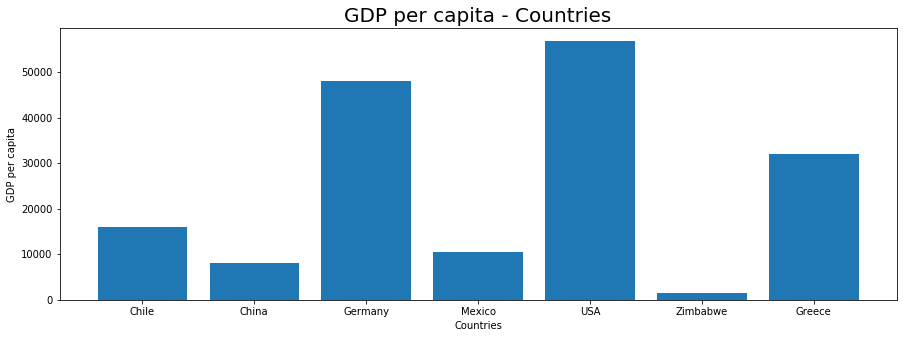

In [4]:
plt.rcParams['figure.figsize'] = [15,5]
plt.bar(df['Country'], df['GDP_avg'])
plt.title('GDP per capita - Countries', fontsize = 20)
plt.xlabel('Countries')
plt.ylabel('GDP per capita')
#plt.xticks(df['Country'], df['GDP_avg'])
plt.show()



On the second bar chart, the **variance** of Life Expectancy across the seven countries is significantly lower.
The only partial exception to this is Zimbabwe, which scores much lower on this metric (highest value at Year = 2015, Life Exp. = 59.534 yrs).



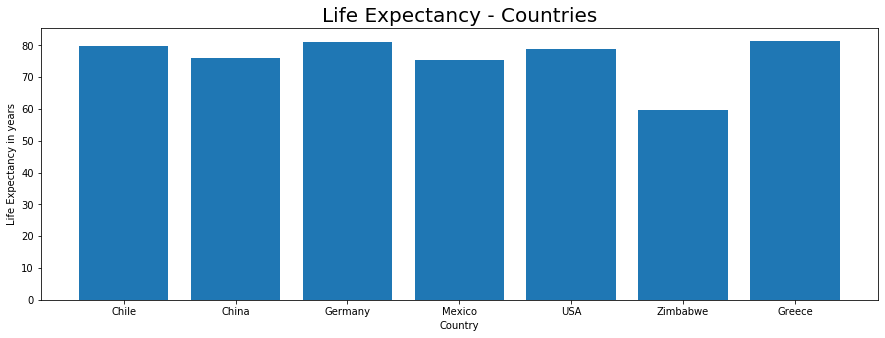

In [5]:
plt.rcParams['figure.figsize'] = [15,5]
plt.bar(df['Country'], df['LEABY'])
plt.title('Life Expectancy - Countries', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Life Expectancy in years')
plt.show()

##  4. Violin Plots To Compare Life Expectancy Distributions 

Another way to compare two datasets is to visualize the distributions of each and to look for patterns in the shapes.
The violin plot features a kernel density estimation of the underlying distribution, whicn in our case is the **specified year**, where the measurement of **Life Expectancy** took place.

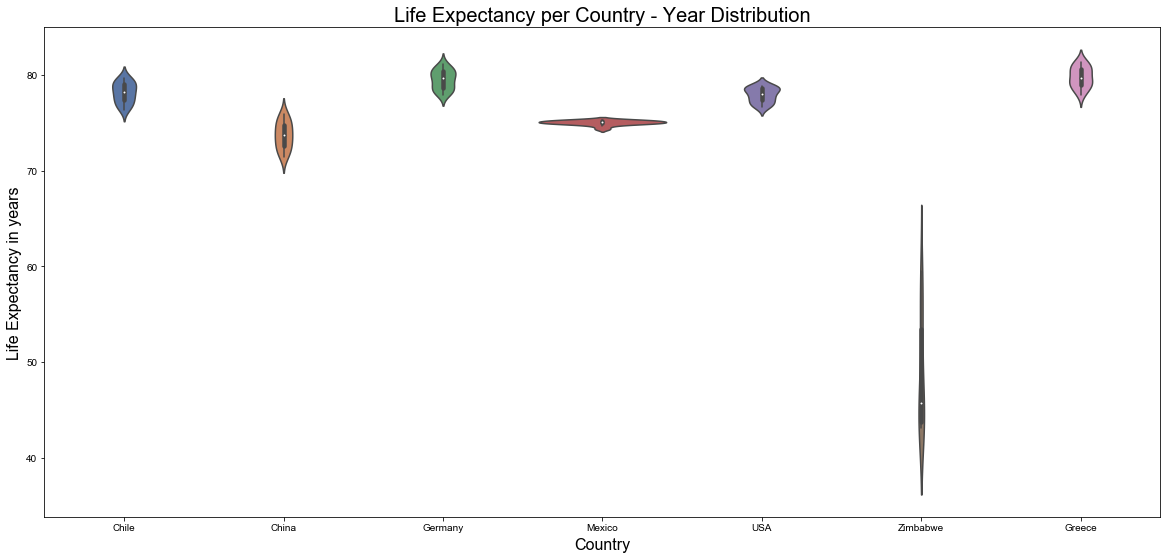

In [6]:
fig = plt.subplots(figsize=(20, 9)) 
sns.set(style="whitegrid")
ax = sns.violinplot(df['Country'], df['LEABY']);
plt.ylabel('Life Expectancy in years', fontsize = 16)
plt.title('Life Expectancy per Country - Year Distribution', fontsize = 20)
plt.xlabel('Country', fontsize = 16);

On the figure above, the thinner the shape of the "violin" becomes, the greater the Life Expectancy distribution among the 15 year timeframe is. Zimbabwe namely, achieved an increase in **Life Expectancy of 14.885 yrs** compared to its starting value.

On the other hand, Mexico's "violin" is the most flattened one due to the very low fluctuation of its Life Exp.

##  5. Bar Plots Of GDP and Life Expectancy over time

We want to compare the GDPs per capita of the countries over time, in order to get a sense of the relationship between GDP and life expectancy. 

First, I have plotted the progession of GDP's over the years by country in a barplot using Seaborn.

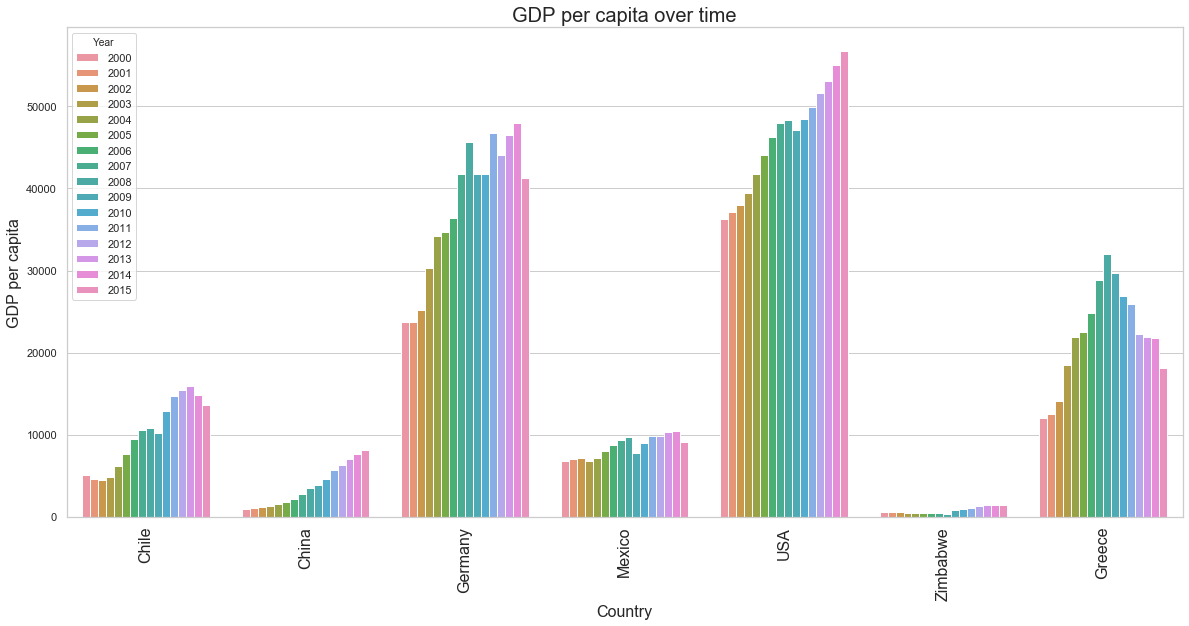

In [7]:
f, ax = plt.subplots(figsize=(20, 9))
ax = sns.barplot(x="Country", y="GDP_avg", hue="Year", data=df)
plt.title("GDP per capita over time", fontsize = 20)
plt.ylabel("GDP per capita", fontsize = 16)
plt.xlabel("Country", fontsize = 16)
plt.xticks(rotation='vertical', fontsize = 16);

Now that we have plotted a barplot that clusters GDP over time by Country, **let's do the same for Life Expectancy**.

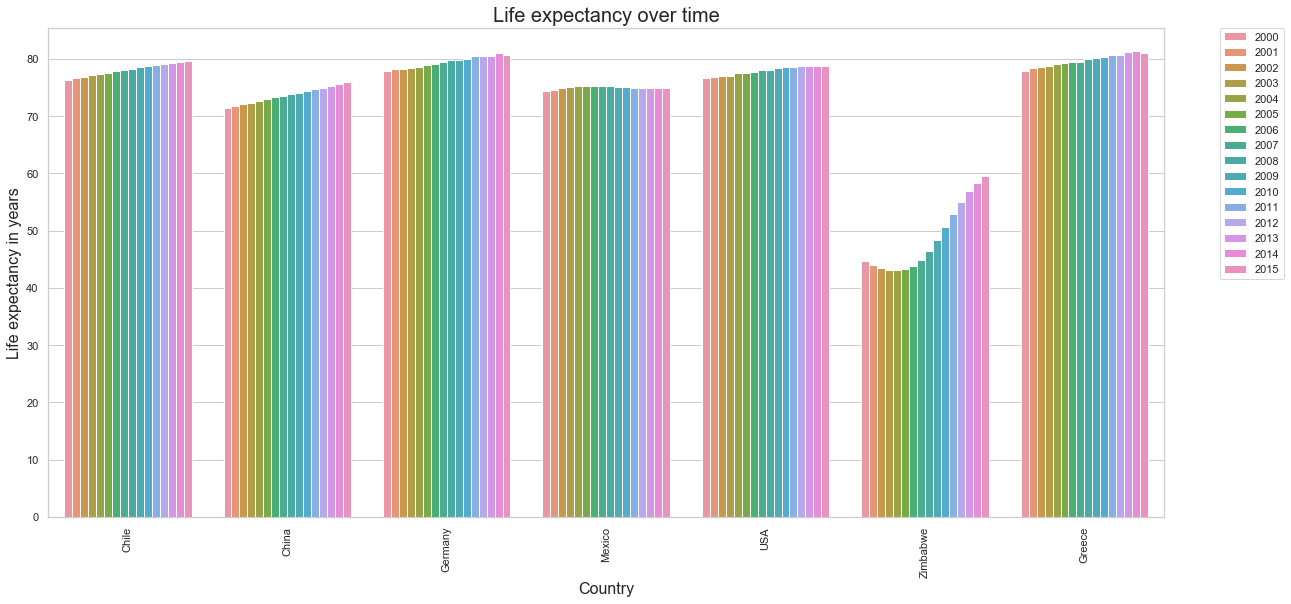

In [8]:
f, ax = plt.subplots(figsize=(20, 9)) 
ax = sns.barplot(x="Country", y="LEABY", hue="Year", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Life expectancy over time", fontsize = 20)
plt.ylabel("Life expectancy in years", fontsize = 16)
plt.xlabel("Country", fontsize = 16)
plt.xticks(rotation='vertical');

At this point, I will attempt to draw some conclusions with regards to the correlation between GDP per Capita and Life expectancy as well as analyze the extracted information from the above barplots.

- China, Chile and Zimbabwe show the biggest increase in GDP per capita with regards to their staring GDP (Year=2000).
- In all Countries except Zimbabwe, there is an observable GDP decrease in 2008. The **Finanical crisis** of 2007-2008 seems to play a role in this, especially on the case of Greece, whose GDP has plumetted since then.
- Mexico had clearly the least change in GDP over this timeframe.
- Life expectancy constantly increases across the board in a declining rate nevertheless. Zimbabwe is an exception once again, having a rapid increase on this metric starting in 2007. The drop in HIV-related mortality due to improved treatments might also be a cause for this increase.  

A stark correlation of GDP - Life Exp would indicate that after Greece's economic collapse, the Life Exp. should have also dropped which is not the case. Zimbabwe on the other hand, pairs a stready increase of GDP with an increase of Life Exp. 

Rest countries seem to follow the same pattern; **Increase in GDB - small raise in Life Exp**.

##  6. Line Plots for Life Expectancy

I will now go ahead and plot each set of data on its own subplot for every different country.

Fortunately, **Seaborn** has a special function called `FacetGrid` that enables us to create multiple plots for comparison (one for each country).

Let the peak of every bar on the previous two graphs be a point. You can imagine the following line plots as the linking of all these points together, so that we can better **isolate** the change of GDP per capita and Life Expectancy over time.  

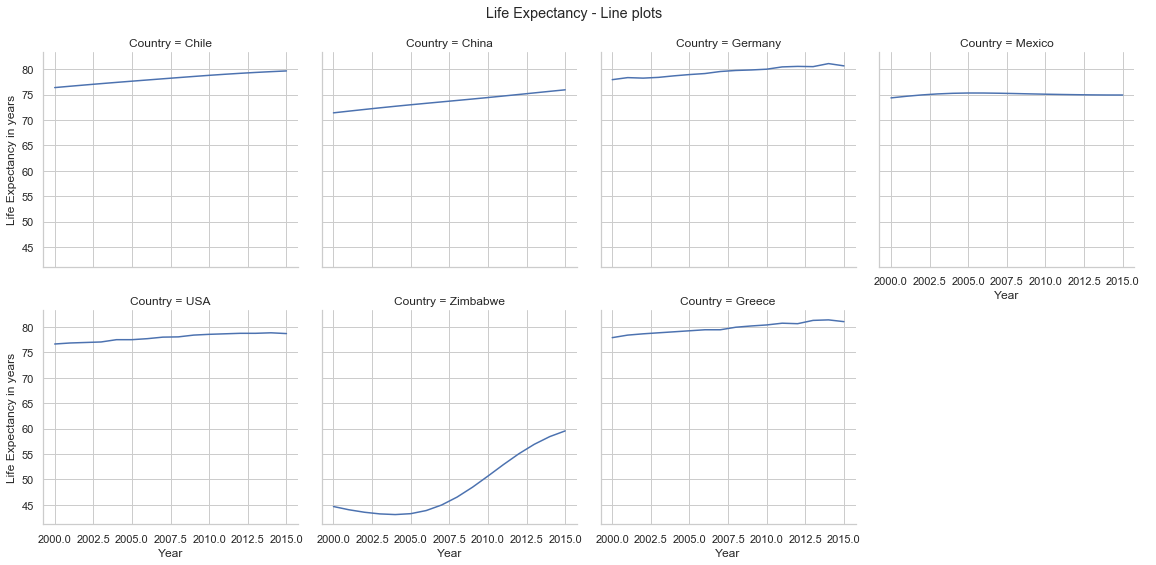

In [9]:
g3 = sns.FacetGrid(df, col="Country", col_wrap=4, height=4)
g3 = (g3.map(plt.plot, "Year", "LEABY").add_legend().set_axis_labels("Year", "Life Expectancy in years"))
plt.subplots_adjust(top=0.9)
g3.fig.suptitle('Life Expectancy - Line plots');

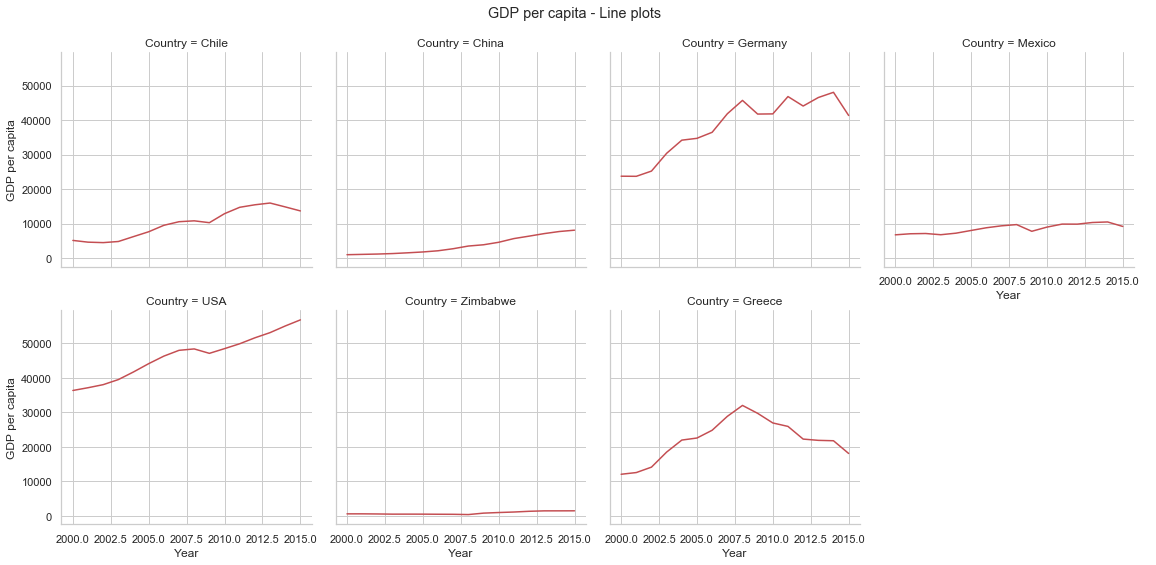

In [10]:
g3 = sns.FacetGrid(df, col="Country", col_wrap=4, height=4)
g3 = (g3.map(plt.plot, "Year", "GDP_avg", color='r').add_legend().set_axis_labels("Year", "GDP per capita"))
plt.subplots_adjust(top=0.9)
g3.fig.suptitle('GDP per capita - Line plots');

##  7. Scatter Plots of GDP and Life Expectancy Data

To create a visualization that will make it easier to see the possible correlation between GDP and life expectancy, we can plot each set of data on its own subplot, on a shared figure.

We will also use `FacetGrid` function of **Seaborn** here.

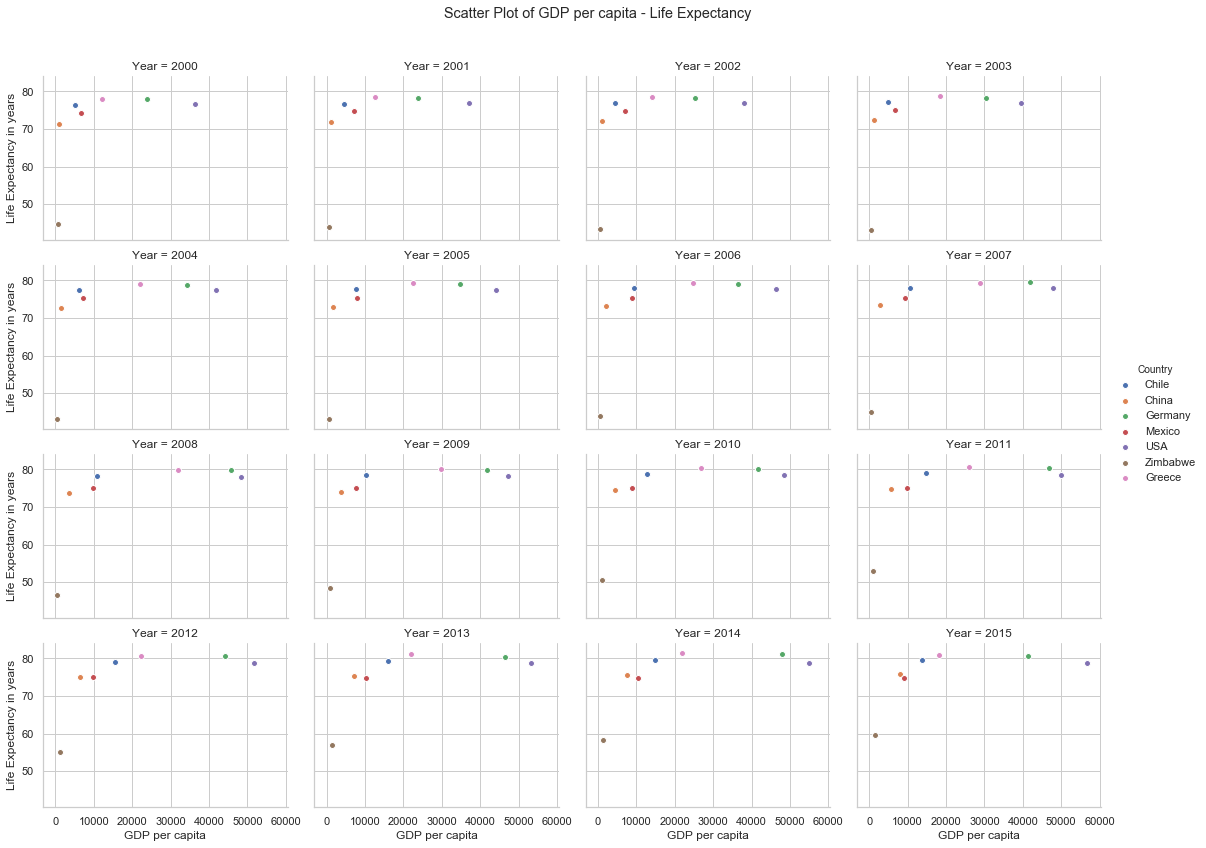

In [11]:
g = sns.FacetGrid(df, col="Year", hue= "Country", col_wrap=4, height=3, aspect=1.3)
g = (g.map(plt.scatter, "GDP_avg", "LEABY", edgecolor="w").add_legend().set_axis_labels("GDP per capita", "Life Expectancy in years"))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plot of GDP per capita - Life Expectancy');

The United States move the most along the X axis and Zimbabwe, as expected, moves the most along the Y axis.

## 8. Spearman correlation coefficient - Conclusion

Following this, we could also calcutate quantitavely the correlation between GDP per capita and Life of Expectancy through the **Spearman rank-order correlation coefficient**.


Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.


But first we need to import two more python modules, namely **numpy**,**scipy.stats** and read the corresponding column values from our .csv file to perform the calculation. 

In [12]:
import numpy as np
import scipy.stats
import scipy as sp


In [13]:
df2 = pd.read_csv('all_data_3.csv', nrows=114)

x = df2['Life expectancy at birth (years)']
y = df2['GDP per capita']

rvalue, pvalue = sp.stats.spearmanr(x,y)
print(rvalue)

0.828839102525109


A coefficient of correlation of **r = +0.83**  indicates a strong correlation between the independent variable (GDP per capita) and the dependent variable (Life expectanty at birth in years). 

However, I would like to acknoweldge that the DataFrame used on this project is relatively small and the analysis fairly primitive ( no standard deviation calculation or error bars, few variables, etc ), therefore a causal relationship between the two is hardly proven here. 

A more careful and multivariate analysis implies among others that: GDP per capita affects life expectancy up until a certain threshold. After this is surpassed, the correlation between the variables weakens significantly. 

(source: https://smartech.gatech.edu/bitstream/handle/1853/56031/effect_of_gdp_per_capita_on_national_life_expectancy.pdf?fbclid=IwAR31dz5RAuNaRSLFKtwGBTOaMG1Ngtljn8TdqTmQKpT99AYxnUxHWe7Pe3Q )

Thank you very much for your time.

Any observation or feedback would be greatly appreciated.

Goodbye ;)

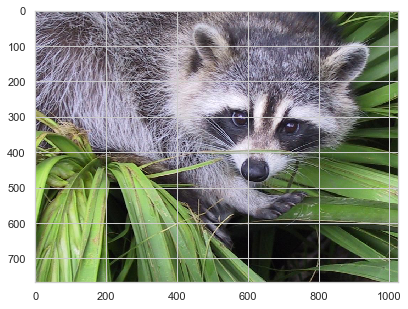

In [14]:
import scipy.misc
face=scipy.misc.face()
plt.imshow(face)
plt.show;